In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import numpy as np
import numpy.linalg as npl

from scipy.spatial import distance_matrix

from tqdm import tqdm
from functools import partial
from typing import Callable, Tuple

import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
from solversuperres_v3.data_utils        import semi_gridded_init
from solversuperres_v3.g_utils           import gradient_g, g
from solversuperres_v3.descent_utilities import clip_domain, projection_X
from solversuperres_v3.opCOMP_init       import opCOMP

import solversuperres_v3.FISTA_restart_descent_v2 as FISTA
import solversuperres_v3.init_utils               as init

from solversuperres_v3.linop_Gaussian_MATIRF        import           Gaussian2D_MATIRF
from solversuperres_v3.linop_Gaussian_MATIRF_Sketch import Sketching_Gaussian2D_MATIRF

In [4]:
# sigma_x = sigma_y = 0.04
sigma_x = sigma_y = None
m_gaussian = 64
m_sketch = 18 * 20 # K * m_spike

linop_gauss  = Gaussian2D_MATIRF(sigma_x, sigma_y, N1=m_gaussian, N2=m_gaussian)
linop_sketch = Sketching_Gaussian2D_MATIRF(m_sketch, linop_gauss.sigma_x, linop_gauss.sigma_y)

In [5]:
d = 3

In [6]:
K = 18
density =np.array([3, 3, 2])
a = np.random.uniform(low=1, high=2, size=K)
t = np.random.uniform(low=0.1, high=0.9, size=(K, d)) * linop_gauss.bounds['max']
t = semi_gridded_init(density=density)
factor = .8
shift = linop_gauss.b1 * ((1 - factor) / 2)
t = t * np.array([factor, factor, 1]) + np.array([shift, shift, 0])
# t = np.array([[.2, .2, .5], [.8, .2, .1], [.2, .8, .9], [.5, .5, .5], [.8, .8, .4]]) * linop_gauss.bounds['max']

In [7]:
np.min(distance_matrix(t, t) + np.eye(K) * 100)

0.8327139935538276

:NdLayout   [Default]
   :Image   [x,y]   (z)
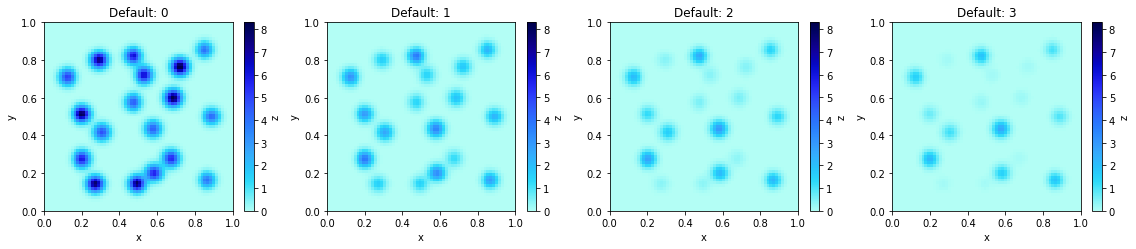

In [8]:
y = linop_gauss.Ax(a, t)
y_image = linop_gauss.image(y)
hv.NdLayout({k: hv.Image(np.flipud(y_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True) for k in range(linop_gauss.K)})

In [9]:
y_sketch = linop_sketch.Ax(a, t)
y_sketch_image = linop_sketch.image(linop_gauss.grid, y_sketch)

:NdLayout   [Default]
   :Image   [x,y]   (z)
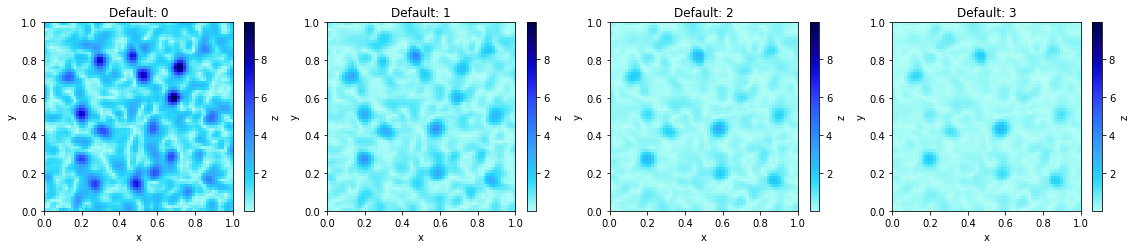

In [10]:
hv.NdLayout({k: hv.Image(np.flipud(y_sketch_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True) for k in range(linop_gauss.K)})

In [11]:
t_grid = np.copy(linop_gauss.grid)
a_grid = np.copy(y)
t_grid.shape, a_grid.shape

((64, 64, 2), (16384,))

:NdLayout   [Default]
   :Image   [x,y]   (z)
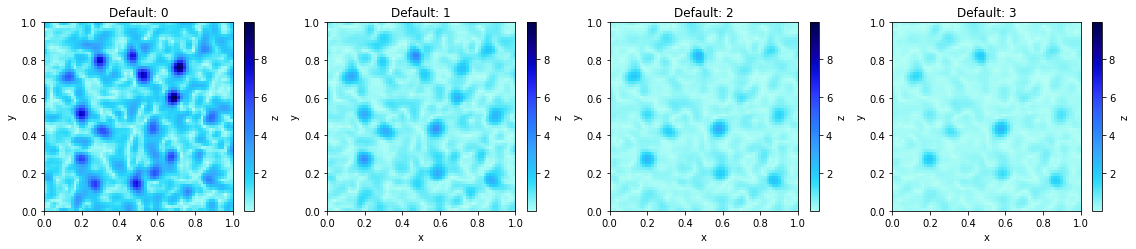

In [12]:
y_fourier = linop_sketch.DFT_DiracComb(a_grid, t_grid)
y_fourier_image = linop_sketch.image(linop_gauss.grid, y_fourier)
hv.NdLayout({k: hv.Image(np.flipud(y_fourier_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True) for k in range(linop_gauss.K)})

:NdLayout   [Default]
   :Image   [x,y]   (z)
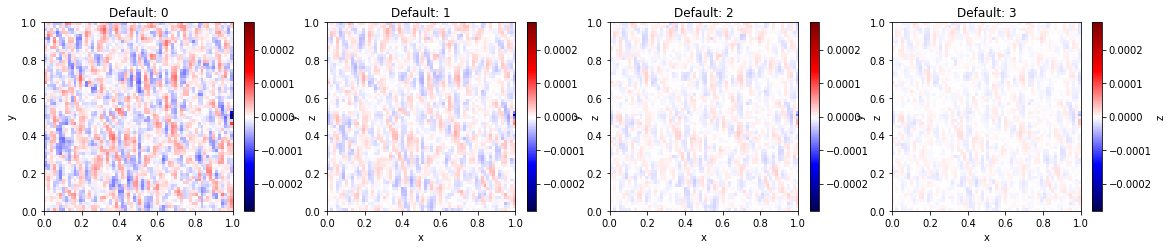

In [13]:
hv.NdLayout({k: hv.Image(np.flipud(y_sketch_image[..., k] - y_fourier_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True, symmetric=True, cmap='seismic') for k in range(linop_gauss.K)})

## With Sketching

In [14]:
functional = partial(
    g, y=y_fourier, linop=linop_sketch
)
gradient_functional = partial(
    gradient_g, y=y_fourier, linop=linop_sketch
)
#proj = lambda X: X
proj = partial(
    projection_X,
    eps_proj=0.01,
    cut_off=3e-2
)

clip = lambda X: X

update_residue = partial(
    FISTA.update_residue_from_y,
    y=y_fourier, linop=linop_sketch
)

exit_cond = partial(
    FISTA.exit_cond,
    abs_tol_cst=1e-8,
    rel_tol_cst=1e-10,
)

In [15]:
a_init, t_init, errors_opCOMP, residue = opCOMP(
    y=y_fourier, linop=linop_sketch,
    step=1e-4, nb_tests=1,
    min_iter=K, max_iter=3*K,
    descent_nit=1_000,
    tol_criterion=0.08,
    init_position=init.init_position_random,
    multicore=False
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:14<00:00,  3.64it/s]


In [16]:
X_init = np.concatenate((t_init, a_init[:, None]), axis=-1)

:Curve   [x]   (y)
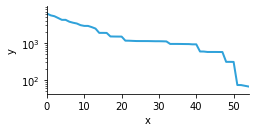

In [17]:
hv.Curve(errors_opCOMP).opts(logy=True)

:Curve   [x]   (y)
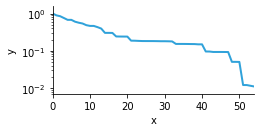

In [18]:
hv.Curve((errors_opCOMP / errors_opCOMP[0])).opts(logy=True)

:NdLayout   [Default]
   :Image   [x,y]   (z)
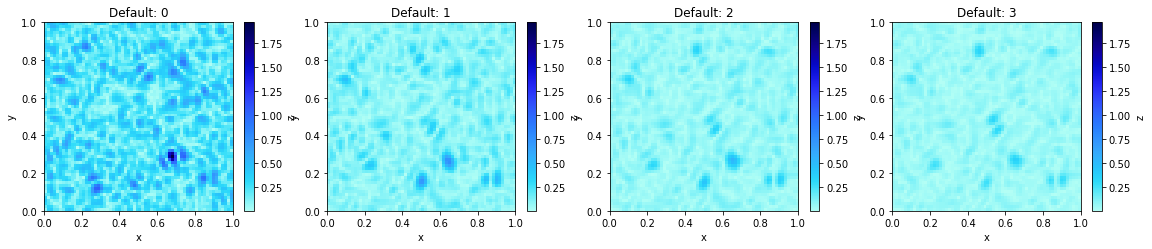

In [19]:
residue_image = linop_sketch.image(linop_gauss.grid, residue)
hv.NdLayout({k: hv.Image(np.flipud(residue_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True) for k in range(linop_gauss.K)})

In [20]:
X_true = np.concatenate((t, a[:, None]), axis=-1)

:Layout
   .Scatter3D.I  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II :Scatter3D   [x,y,z]   (size)
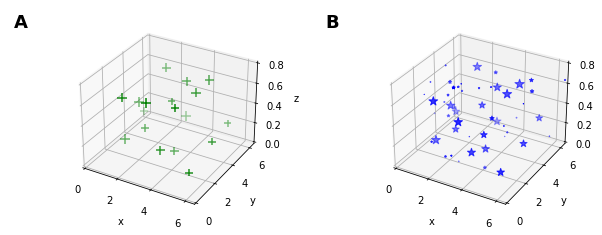

In [21]:
point_opts = dict(
    xlim=(0, linop_sketch.b1),
    ylim=(0, linop_sketch.b2),
    zlim=(0, linop_sketch.b3), 
    s=abs(hv.dim('size') * 50)
)
points_true = hv.Scatter3D(X_true, vdims=['size']).opts(**point_opts, c='g', marker='+')
points_init = hv.Scatter3D(X_init, vdims=['size']).opts(**point_opts, c='b', marker='*')
points_true + points_init

:Overlay
   .Scatter3D.I  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II :Scatter3D   [x,y,z]   (size)
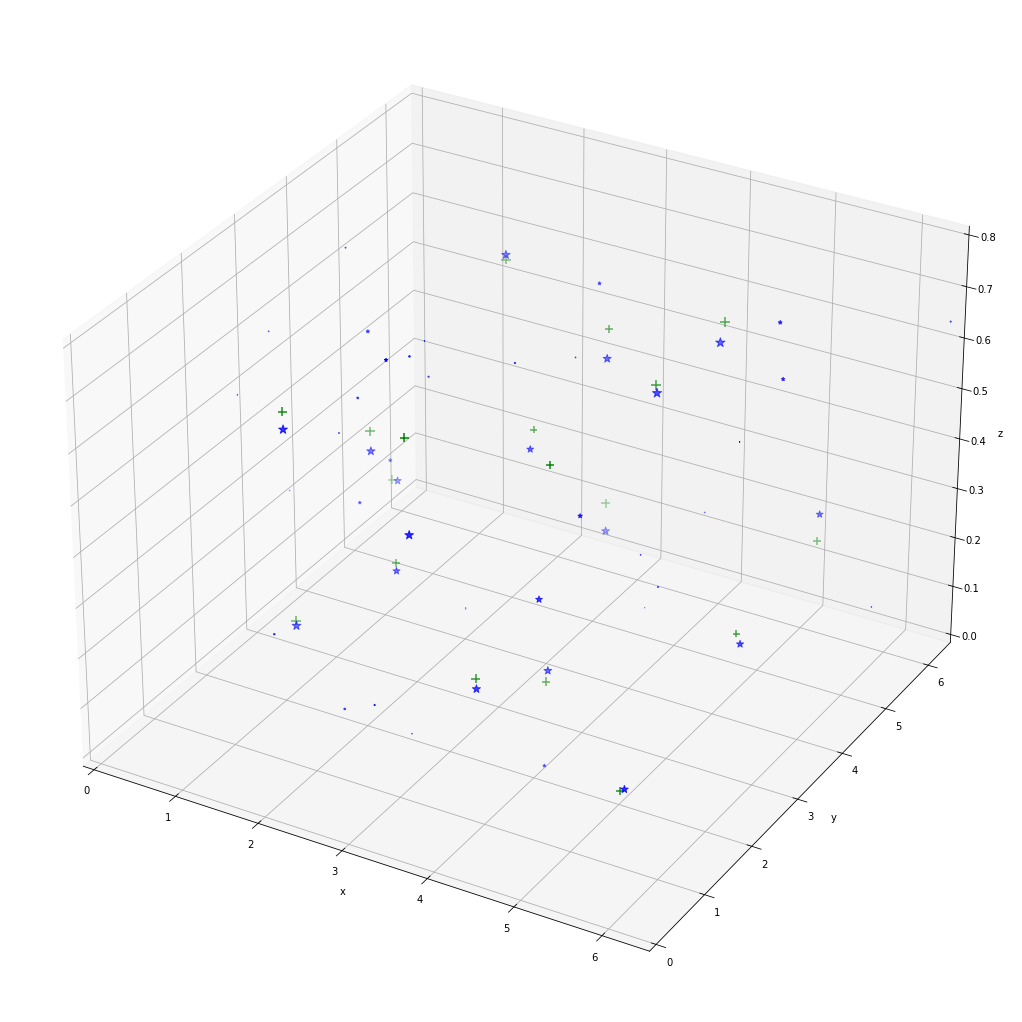

In [22]:
(points_true * points_init).opts(fig_size=500)

In [23]:
X_esti, error_PGD, error_PGD_norm, time_diffs = FISTA.FISTA_restart(
    X=X_init, nit=3_000, step=1e-4, 
    functional=functional,
    gradient_functional=gradient_functional,
    exit_cond=exit_cond, #exit_cond=FISTA.exit_cond,
    restart_cond=FISTA.restart_cond,
    project=proj, clip=clip, 
    functional_y=npl.norm(y_fourier)**2
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:20<00:00, 143.01it/s]


:Curve   [x]   (y)
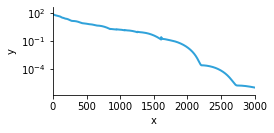

In [24]:
hv.Curve(error_PGD).opts(logy=True)

:Curve   [x]   (y)
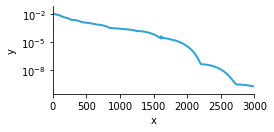

In [25]:
hv.Curve(error_PGD_norm**2).opts(logy=True)

In [26]:
errors_opCOMP[-2], error_PGD[-1]

(70.59217478310457, 1.09170147473188e-06)

In [27]:
(abs(error_PGD[-1] - error_PGD[-2]) /  abs(error_PGD[-2]))

0.0031686912855449782

:Layout
   .Scatter3D.I   :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.III :Scatter3D   [x,y,z]   (size)
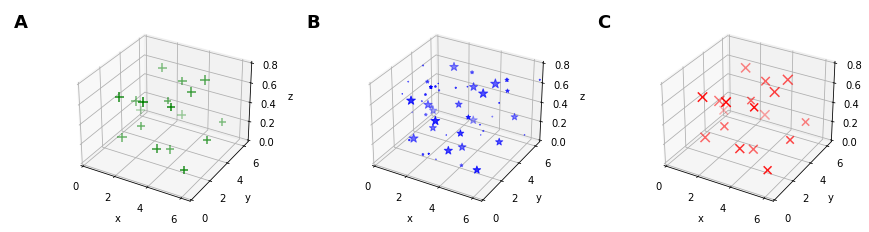

In [28]:
point_opts = dict(
    xlim=(0, linop_sketch.b1),
    ylim=(0, linop_sketch.b2),
    zlim=(0, linop_sketch.b3), 
    s=abs(hv.dim('size') * 50)
)
points_true = hv.Scatter3D(X_true, vdims=['size']).opts(**point_opts, c='g', marker='+')
points_init = hv.Scatter3D(X_init, vdims=['size']).opts(**point_opts, c='b', marker='*')
points_esti = hv.Scatter3D(X_esti, vdims=['size']).opts(**point_opts, c='r', marker='x')
points_true + points_init + points_esti

:Overlay
   .Scatter3D.I  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II :Scatter3D   [x,y,z]   (size)
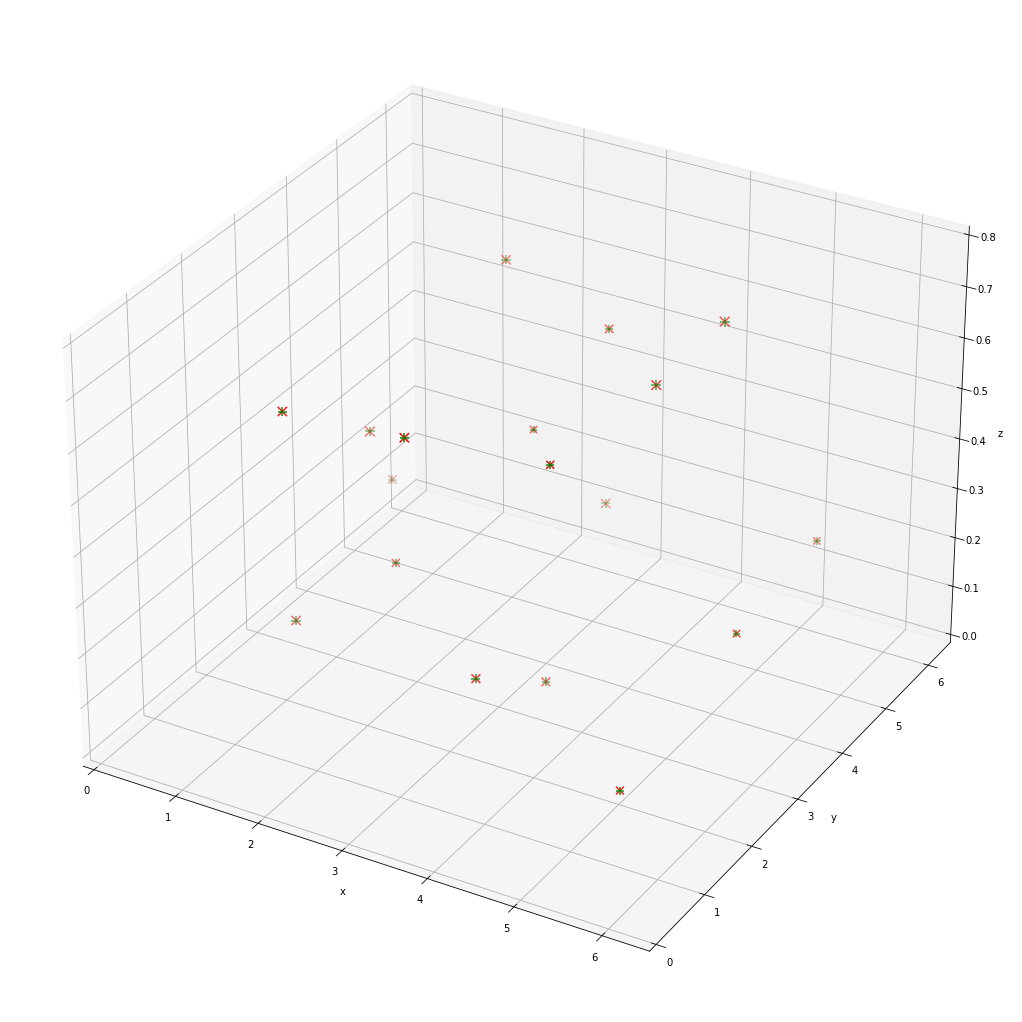

In [29]:
(points_true * points_esti).opts(fig_size=500)

:NdLayout   [Default]
   :Image   [x,y]   (z)
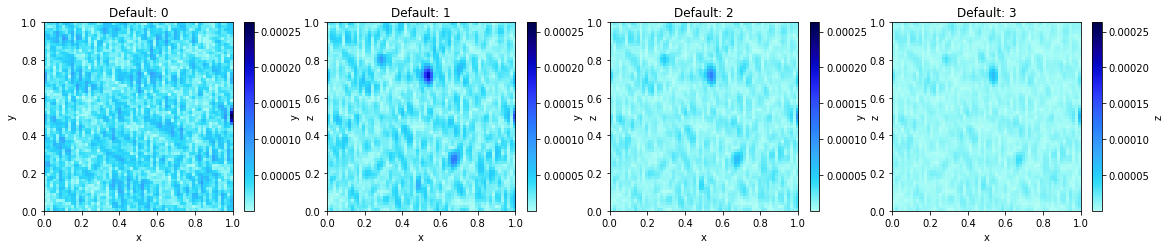

In [30]:
residue_PGD = y_fourier - linop_sketch.Ax(X_esti[:, -1], X_esti[:, :-1])
residue_PGD_image = linop_sketch.image(linop_gauss.grid, residue_PGD)
hv.NdLayout({k: hv.Image(np.flipud(residue_PGD_image[..., k]), bounds=(0, 0, 1, 1)).opts(colorbar=True) for k in range(linop_gauss.K)})

## No sketching

In [31]:
functional = partial(
        g, y=y, linop=linop_gauss
)
gradient_functional = partial(
    gradient_g, y=y, linop=linop_gauss
)
#proj = lambda X: X
proj = partial(
    projection_X,
    eps_proj=0.01,
    cut_off=3e-2
)

clip = lambda X: X

update_residue = partial(
    FISTA.update_residue_from_y,
    y=y, linop=linop_gauss
)

exit_cond = partial(
    FISTA.exit_cond,
    abs_tol_cst=1e-8, 
    rel_tol_cst=1e-10,
)

In [32]:
a_init, t_init, errors_opCOMP, residue = opCOMP(
    y=y, linop=linop_gauss,
    step=1e-4, nb_tests=1,
    min_iter=K, max_iter=3*K,
    descent_nit=1_000,
    tol_criterion=0.08,
    init_position=init.init_position_max_val,
    multicore=False,
)

 31%|█████████████████████████████████████████████▉                                                                                                    | 17/54 [00:01<00:02, 12.87it/s]


In [33]:
X_init = np.concatenate((t_init, a_init[:, None]), axis=-1)

:Curve   [x]   (y)
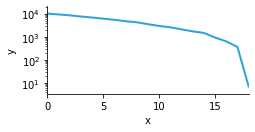

In [34]:
hv.Curve(errors_opCOMP).opts(logy=True)

:Image   [x,y]   (z)
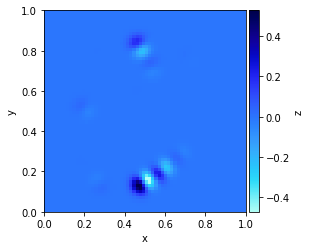

In [35]:
residue_image = linop_gauss.image(residue)
hv.Image(np.flipud(residue_image[..., 0]), bounds=(0, 0, 1, 1)).opts(colorbar=True)

In [36]:
X_esti, error_PGD, error_PGD_norm, time_diffs = FISTA.FISTA_restart(
    X=X_init, nit=3_000, step=1e-5, 
    functional=functional,
    gradient_functional=gradient_functional,
    exit_cond=exit_cond, #FISTA.exit_cond,
    restart_cond=FISTA.restart_cond,
    project=proj, clip=clip,
    functional_y=npl.norm(y)**2
)

  9%|████████████▋                                                                                                                                  | 266/3000 [00:09<01:34, 29.02it/s]


:Curve   [x]   (y)
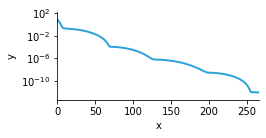

In [37]:
hv.Curve(error_PGD).opts(logy=True)

:Curve   [x]   (y)
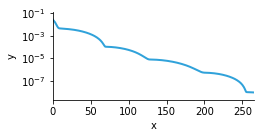

In [38]:
hv.Curve(error_PGD_norm).opts(logy=True)

In [39]:
error_PGD[-2], error_PGD[-1]

(1.009484364294197e-12, 9.858300113687312e-13)

In [40]:
error_PGD_norm[-2], error_PGD_norm[-1]

(1.0003150127816274e-08, 9.885257940094786e-09)

In [41]:
X_true = np.concatenate((t, a[:, None]), axis=-1)

:Layout
   .Scatter3D.I   :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.III :Scatter3D   [x,y,z]   (size)
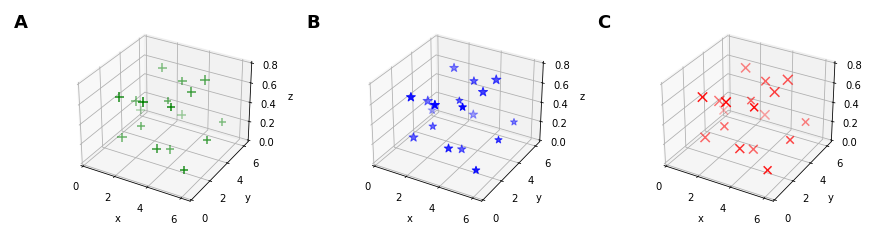

In [42]:
point_opts = dict(
    xlim=(0, linop_gauss.b1),
    ylim=(0, linop_gauss.b2),
    zlim=(0, linop_gauss.b3), 
    s=abs(hv.dim('size') * 50)
)
points_true = hv.Scatter3D(X_true, vdims=['size']).opts(**point_opts, c='g', marker='+')
points_init = hv.Scatter3D(X_init, vdims=['size']).opts(**point_opts, c='b', marker='*')
points_esti = hv.Scatter3D(X_esti, vdims=['size']).opts(**point_opts, c='r', marker='x')
points_true + points_init + points_esti

:Overlay
   .Scatter3D.I  :Scatter3D   [x,y,z]   (size)
   .Scatter3D.II :Scatter3D   [x,y,z]   (size)
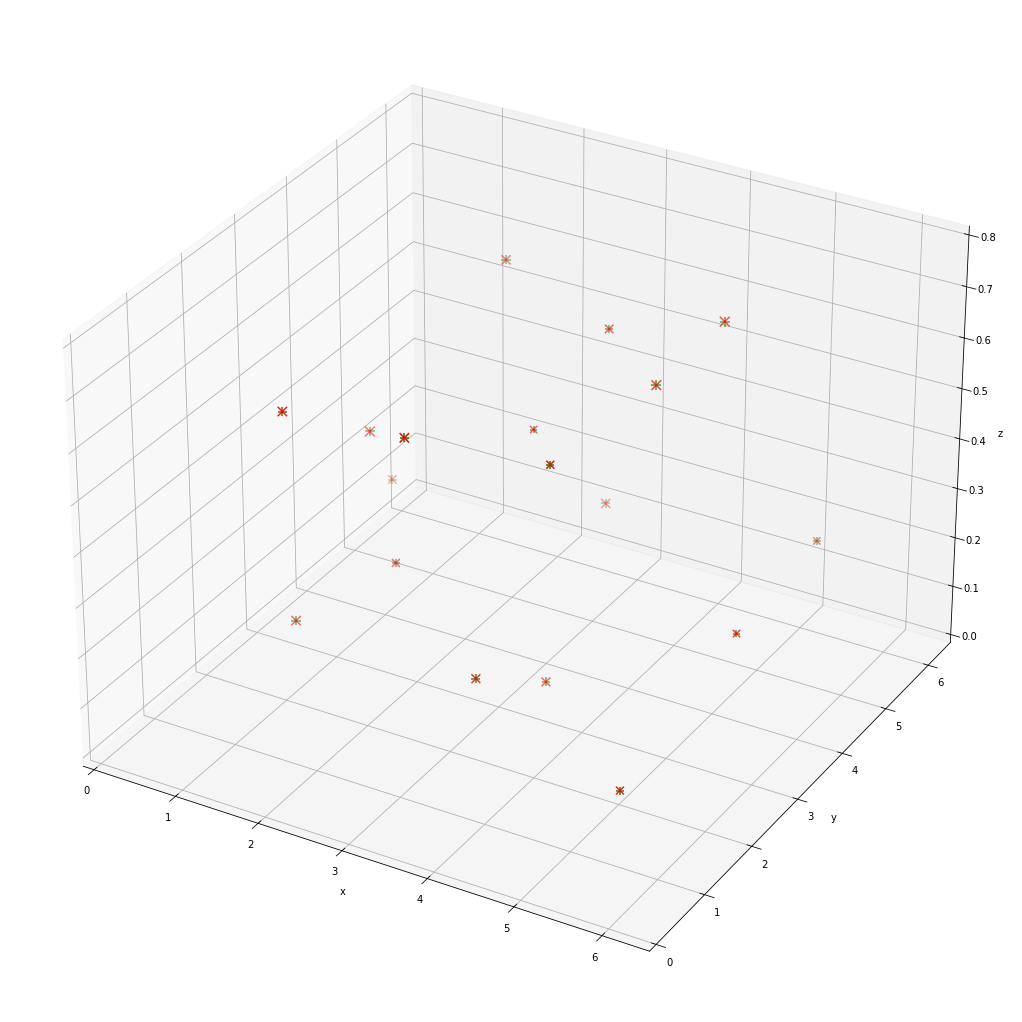

In [43]:
(points_true * points_esti).opts(fig_size=500)